In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

%matplotlib inline 

### Read in the dataframes (cancer, income)

* Keep only the rows where facilities are in TN.

In [5]:
# create cancer_costs_df from mmd_cancer_data.csv
cancer_costs_df = pd.read_csv('../data/mmd_cancer_data.csv')
cancer_costs_df.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,analysis_value
0,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1001,Autauga County,ALABAMA,Urban,All,undefined,19293
1,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,1003,Baldwin County,ALABAMA,Rural,All,undefined,17151


In [6]:
# keep only rows where state = TENNESSEE
cancer_costs_tn = cancer_costs_df.loc[cancer_costs_df['state'] == 'TENNESSEE']

In [7]:
print(cancer_costs_tn.shape) #prints (rows,columns)

(95, 17)


In [8]:
cancer_costs_tn['county'].nunique() # 95 counties represented

95

In [9]:
income_df = pd.read_csv('../data/irs_county_2016.csv')
income_df.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,1,AL,0,Alabama,1,26450,14680,9740,680,17780,...,4300,9256,70,57,0,0,2590,3685,11510,35079
1,1,AL,0,Alabama,2,285760,217880,25170,39740,143390,...,70050,40569,0,0,0,0,22720,11109,237630,263152


In [10]:
# keep data only in TN
income_tn = income_df.loc[income_df['STATE'] == 'TN'] 
income_tn.head(2)

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,agi_stub,N1,mars1,MARS2,MARS4,PREP,...,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
19752,47,TN,0,Tennessee,1,39580,22400,14440,980,25390,...,6760,17669,200,287,0,0,3970,7167,16170,59567
19753,47,TN,0,Tennessee,2,439770,345410,39920,49300,188490,...,109250,62045,0,0,0,0,37380,18477,366150,366510


In [11]:
print(income_tn.shape)

(768, 148)


### Modify income_tn dataframe
* slice (select) columns you want from dataframe
* rename necessary columns

In [12]:
# select/slice only the columns we want from income_df
income_tn = income_tn[['STATE', 'COUNTYNAME', 'agi_stub', 'N1', 'mars1',
                       'MARS2', 'MARS4', 'N2', 'NUMDEP', 'ELDERLY', 'A00100', 'N02650', 
                       'A02650', 'N02300', 'A02300']]
# rename columns
income_tn.columns = ['state', 'county', 'income_bucket', 
                     'return_count', 'single_returns', 'joint_returns', 
                     'head_of_house_returns', 'exemptions', 'dependents', 
                     'elderly', 'agi', 'returns_with_total_inc','total_inc_amt', 
                     'returns_with_unemployment', 'unemployment_comp']
income_tn.head()

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19752,TN,Tennessee,1,39580,22400,14440,980,60360,8230,19090,-2747555,29090,-2710342,90,348
19753,TN,Tennessee,2,439770,345410,39920,49300,443540,108380,74190,2366417,439780,2441687,4830,12132
19754,TN,Tennessee,3,717430,398720,115040,189290,1269420,472350,141070,12289681,717430,12486175,19660,58771
19755,TN,Tennessee,4,759340,355970,217710,159890,1486710,512170,154020,27370414,759340,27694026,19120,57012
19756,TN,Tennessee,5,396810,128390,215890,42240,881020,268500,106740,24350682,396810,24651803,10630,33894


In [13]:
# delete rows in income_tn that has county listed as Tennessee
income_tn = income_tn.drop([19752, 19753, 19754, 19755, 19756, 19757, 19758, 19759], axis =0)
income_tn.head(10)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19760,TN,Anderson County,1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,2,5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156
19762,TN,Anderson County,3,8190,4670,1500,1840,13930,4590,1950,140592,8190,142497,180,597
19763,TN,Anderson County,4,8280,3750,2810,1440,16160,5090,2030,298169,8280,300960,200,699
19764,TN,Anderson County,5,4630,1390,2720,420,10470,3110,1510,284857,4630,287608,140,539
19765,TN,Anderson County,6,2950,510,2270,130,7320,2110,1090,255501,2950,257993,60,236
19766,TN,Anderson County,7,3850,380,3350,110,10020,2820,1530,516344,3850,521922,60,225
19767,TN,Anderson County,8,830,60,740,0,2150,580,400,292013,830,298832,0,0
19768,TN,Bedford County,1,350,180,160,0,560,60,190,-29152,270,-28891,0,0
19769,TN,Bedford County,2,3010,2230,340,410,3410,940,570,16447,3010,16807,40,86


### Look at distribtion of analysis_value within state of TN for cancer_cost_tn

In [14]:
cancer_costs_tn_urban = cancer_costs_tn.loc[cancer_costs_tn['urban'] == 'Urban']

In [15]:
cancer_costs_tn_urban.analysis_value.describe()

count       38.000000
mean     19638.605263
std       2712.218435
min      15454.000000
25%      17674.750000
50%      19203.500000
75%      20556.750000
max      27740.000000
Name: analysis_value, dtype: float64

In [16]:
cancer_costs_tn_rural = cancer_costs_tn.loc[cancer_costs_df['urban'] == 'Rural']

In [17]:
cancer_costs_tn_rural.analysis_value.describe()

count       57.000000
mean     19837.421053
std       2255.416100
min      15531.000000
25%      18328.000000
50%      19633.000000
75%      21315.000000
max      25909.000000
Name: analysis_value, dtype: float64

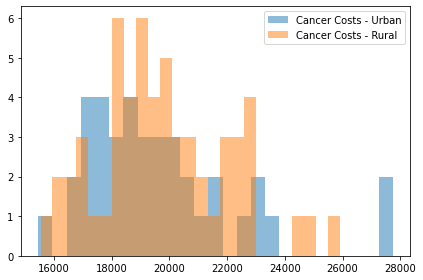

In [18]:
# make a histogram to compare rural and urban distribution in cancer_cost_tn
fig, ax = plt.subplots(facecolor='white') # makes entire background white
cancer_hist = cancer_costs_tn.analysis_value[cancer_costs_tn.urban == 'Urban'].hist(alpha=0.5,bins=25,label='Cancer Costs - Urban')
cancer_costs_tn.analysis_value[cancer_costs_tn.urban == 'Rural'].hist(alpha=0.5,bins=25,label='Cancer Costs - Rural')
cancer_hist.legend()
plt.tight_layout()
plt.grid(False)
plt.savefig('../assets/cancer_cost_urbanvrural_copy.png', dpi = 300);

### Create income_dict, a dictionary that uses the numerical codes in the income bucket column as keys and the matching descriptions as values
* `('Total', 'Under $1', 'Between 1 and $10,000', 'Between 10,000 and $25,000','Between 25,000 and $50,000', 'Between 50,000 and $75,000', 'Between 75,000 and $100,000', 'Between 100,000 and $200,000', '$200,000 or more')`

In [19]:
income_dict = {0:'Total', 1: 'Under $1', 2: 'Between 1 and $10,000', 
              3: 'Between 10,000 and $25,000',4:'Between 25,000 and $50,000', 
               5:'Between 50,000 and $75,000', 6:'Between 75,000 and $100,000', 
               7:'Between 100,000 and $200,000', 8:'$200,000 or more'}

### Pass the dictionary as an argument to the pandas .replace() method to change the income_bucket column so that it uses descriptive text instead of the numeric code.

In [20]:
income_tn.income_bucket = income_tn.income_bucket.replace(income_dict)
income_tn.head(2)

,state,county,income_bucket,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
19760,TN,Anderson County,Under $1,390,220,140,0,570,60,210,-7663,240,-7465,0,0
19761,TN,Anderson County,"Between 1 and $10,000",5170,4010,500,610,5330,1260,950,27496,5170,28135,60,156


### Create a new dataframe income_county_agg to show totals for each county. 
* Use the pandas groupby() method to group the data by county and get the sum() of all numeric columns for that county.
* Be sure to also reset_index() so that our aggregated data is re-indexed to begin at 0.
* Which county has the greatest number of returns? Does it also have the greatest total income?

In [21]:
income_county_agg = income_tn.groupby('county').sum()
income_county_agg.head()

,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
county,,,,,,,,,,,,
Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023
Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119
Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458
Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551


In [22]:
income_county_agg = income_county_agg.reset_index()
income_county_agg.head(2)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023


In [23]:
# which county has the greatest number of returns?
income_county_agg = income_county_agg.loc[income_county_agg['county'] != 'Tennessee']
income_county_agg.loc[income_county_agg.return_count.idxmax()]

county                       Shelby County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
Name: 78, dtype: object

### Create a calculated column in the income_county_agg DataFrame which gives the approximate average household income for each county. Calculate this as 1000*total_inc_amt / return_count.

In [24]:
income_county_agg['approx_avg_income'] = round(1000 * income_county_agg['total_inc_amt']/income_county_agg['return_count'], 0)
income_county_agg.head()

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47128.0
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41297.0
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39744.0
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.0


### Create a histogram showing the distribution of average incomes across all counties in Tennessee. Be sure to remove the Tennessee row prior to creating this histogram

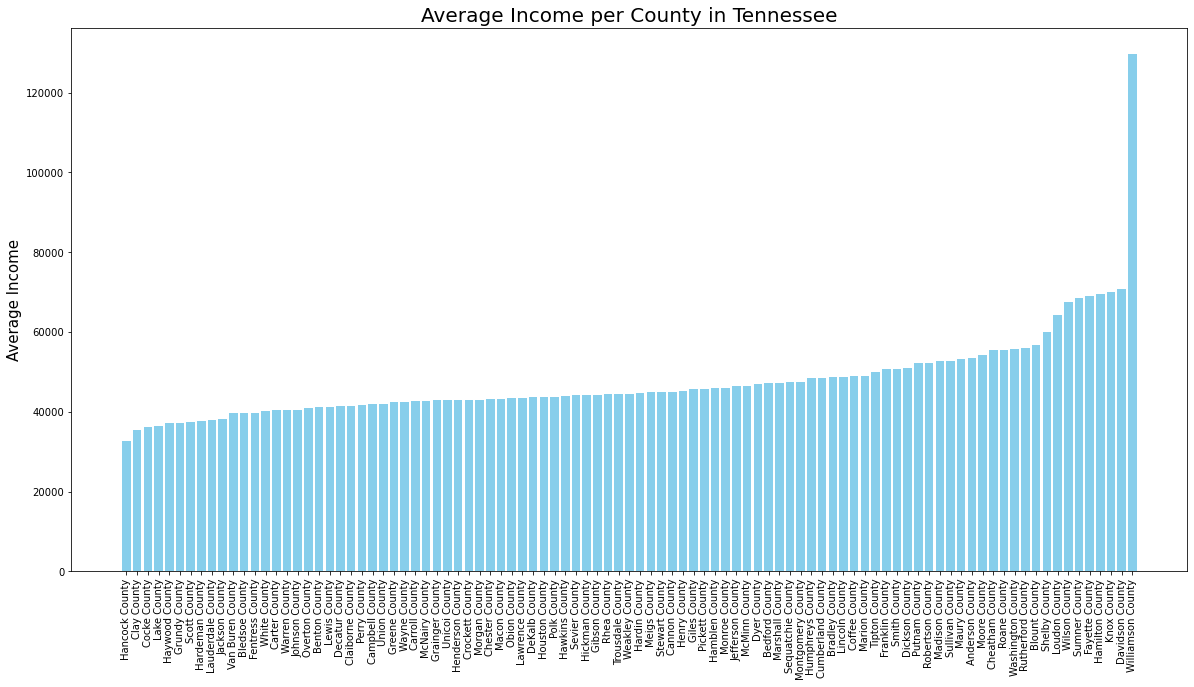

In [25]:
data = income_county_agg.sort_values('approx_avg_income')
plt.figure(figsize = (20,10))
# fig, ax = plt.subplots(facecolor='white')
plt.bar('county', 'approx_avg_income', data = data, color = 'skyblue')
plt.xticks(rotation = 90)
plt.ylabel('Average Income', fontsize=15)
plt.grid(False)
plt.title('Average Income per County in Tennessee', fontsize=20)
plt.savefig('../assets/avg_income_per_county_tn.png', dpi = 300);

In [26]:
income_county_agg.tail(5)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
90,Wayne County,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987,42557.0
91,Weakley County,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449,44527.0
92,White County,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770,40297.0
93,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,129769.0
94,Wilson County,64160,26680,29070,6880,128480,40230,15240,4256127,64000,4325080,1010,3424,67411.0


county                       Wilson County
return_count                        431650
single_returns                      205500
joint_returns                       104290
head_of_house_returns               112920
exemptions                          836590
dependents                          325450
elderly                              86860
agi                               25467506
returns_with_total_inc              430150
total_inc_amt                     25843890
returns_with_unemployment             8020
unemployment_comp                    26306
approx_avg_income                   129769
dtype: object

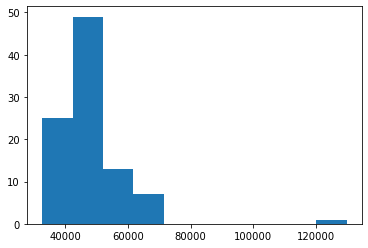

In [27]:
# another way to actually make histogram
# with amount of counties as y-axis, and avg income as x-axis
data = income_county_agg.sort_values('approx_avg_income')
plt.hist('approx_avg_income', data=data)
data.max() # will tell you which county has the highest avg income

### For both tn_cancer_costs and tn_ha_costs, create boxplots and swarmplots comparing the distribution of analysis_value for urban counties vs. rural counties. What do you notice?

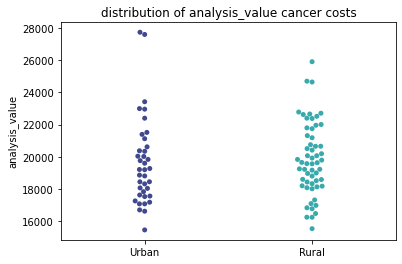

In [28]:
sns.swarmplot(x=cancer_costs_tn.urban, y=cancer_costs_tn.analysis_value, palette = 'mako')
plt.grid(False)
plt.title('distribution of analysis_value cancer costs')
plt.xlabel('');

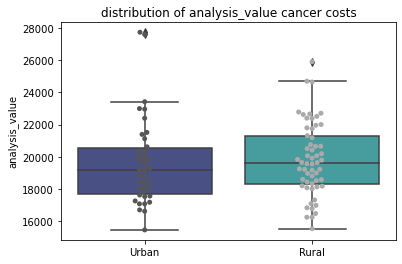

In [29]:
# can overlay swarmplot on boxplot
sns.boxplot(y=cancer_costs_tn.analysis_value, x = cancer_costs_tn.urban, palette = "mako" )
sns.swarmplot(x=cancer_costs_tn.urban, y=cancer_costs_tn.analysis_value, palette = 'gist_gray')
plt.xlabel('')
plt.title('distribution of analysis_value cancer costs');


####  In `cancer_costs_tn` DataFrame, rename the `analysis_value` column to `cancer_avg_cost`

In [30]:
# rename analysis_value to cancer_avg_cost
cancer_costs_tn = cancer_costs_tn.rename(columns = {'analysis_value':'cancer_avg_cost'})
cancer_costs_tn.head(2)

,year,geography,measure,adjustment,analysis,domain,condition,primary_sex,primary_age,primary_dual,fips,county,state,urban,primary_race,primary_denominator,cancer_avg_cost
2396,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47001,Anderson County,TENNESSEE,Urban,All,undefined,15454
2397,2017,County,Average total cost,Unsmoothed actual,Base measure,Primary chronic conditions,"Cancer, Colorectal, Breast, Prostate, Lung",All,All,Dual & non-dual,47003,Bedford County,TENNESSEE,Rural,All,undefined,19219


In [31]:
income_county_agg

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47128.0
2,Benton County,6610,2660,2840,1000,13020,3890,2000,269227,6580,272971,360,1119,41297.0
3,Bledsoe County,4560,1620,2220,610,9690,3100,1200,178860,4540,181231,160,458,39744.0
4,Blount County,59550,25090,26650,6550,115820,33400,16880,3333654,59350,3381616,1190,3551,56786.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Wayne County,5730,2150,2720,810,11830,3690,1430,240866,5700,243850,290,987,42557.0
91,Weakley County,12850,5440,5360,1800,25130,7820,3320,563374,12810,572176,600,1449,44527.0
92,White County,11030,4430,4900,1510,22230,6900,2790,438258,10990,444471,360,770,40297.0
93,Williamson County,103130,39860,54520,6880,226210,79870,24130,13101310,102890,13383074,1430,5125,129769.0


In [32]:
# slice the columns we want from cancer_costs_tn df
cancer_costs_tn = cancer_costs_tn[['county','urban', 'cancer_avg_cost']]
cancer_costs_tn.head()

,county,urban,cancer_avg_cost
2396,Anderson County,Urban,15454
2397,Bedford County,Rural,19219
2398,Benton County,Rural,21315
2399,Bledsoe County,Rural,19250
2400,Blount County,Urban,17073


In [33]:
income_county_agg.head(2)

,county,return_count,single_returns,joint_returns,head_of_house_returns,exemptions,dependents,elderly,agi,returns_with_total_inc,total_inc_amt,returns_with_unemployment,unemployment_comp,approx_avg_income
0,Anderson County,34290,14990,14030,4550,65950,19620,9670,1807309,34140,1830482,700,2452,53382.0
1,Bedford County,20920,8600,8010,3910,43550,15790,4430,971152,20840,985909,410,1023,47128.0


#### Merge cancer_costs_tn df with `county` and `approx_avg_income` columns from income_county_agg df

In [34]:
tn_df = pd.merge(cancer_costs_tn, income_county_agg[['county', 'approx_avg_income']], on = 'county', how = 'inner')
tn_df.head()

,county,urban,cancer_avg_cost,approx_avg_income
0,Anderson County,Urban,15454,53382.0
1,Bedford County,Rural,19219,47128.0
2,Benton County,Rural,21315,41297.0
3,Bledsoe County,Rural,19250,39744.0
4,Blount County,Urban,17073,56786.0


#### Create a new column `cancer_cost_ratio` by dividing cancer_avg_cost by avg_income

In [35]:
tn_df['cancer_cost_ratio'] = tn_df['cancer_avg_cost']/tn_df['approx_avg_income']
tn_df.head(2)

,county,urban,cancer_avg_cost,approx_avg_income,cancer_cost_ratio
0,Anderson County,Urban,15454,53382.0,0.289498
1,Bedford County,Rural,19219,47128.0,0.407804


### Create chloropleths with cost_income ratio and total income

In [36]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [37]:
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ..."
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ..."
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774...."
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ..."
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ..."


In [38]:
county_name = list(counties.NAME)

In [39]:
county_name_fixed = []
for i in range(len(county_name)):
    county_name_fixed.append(county_name[i] + ' County')

In [40]:
counties['county'] = county_name_fixed

In [41]:
counties_merged = pd.merge(left = counties, right = tn_df, left_on = 'county', right_on = 'county')
counties_merged.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,county,urban,cancer_avg_cost,approx_avg_income,cancer_cost_ratio
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester County,Urban,23421,43147.0,0.542819
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne County,Rural,22658,42557.0,0.532415
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton County,Urban,22398,50067.0,0.447361
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hamilton County,Urban,19272,69608.0,0.276865
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Stewart County,Urban,27740,44939.0,0.617281


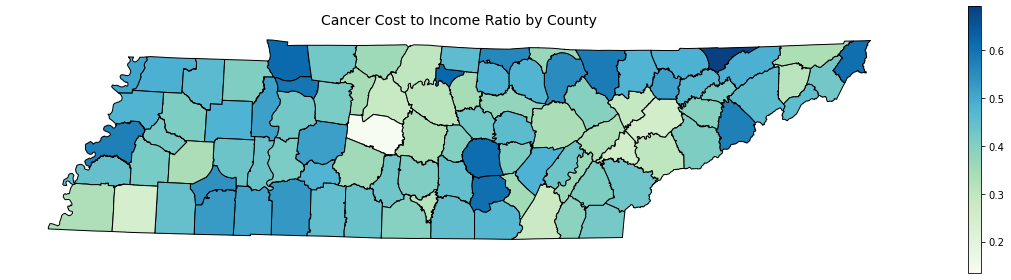

In [68]:
fig, ax = plt.subplots(figsize=(16,4))
counties_merged.plot(column = 'cancer_cost_ratio', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Cancer Cost to Income Ratio by County', fontsize = 14)
ax.axis('off')
plt.tight_layout()
plt.savefig('../assets/cancer_cost_income_ratio_tncounty_mako.png', dpi = 300);

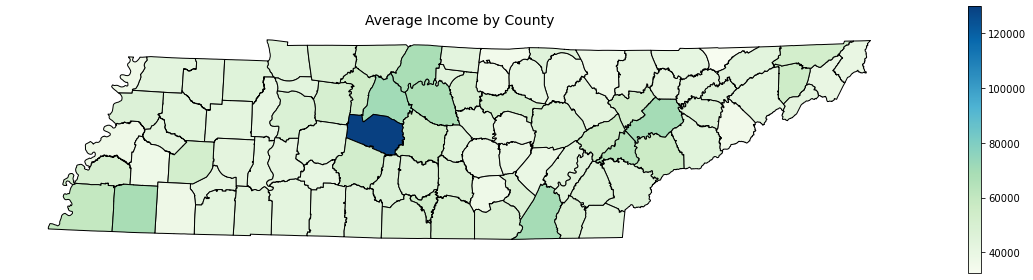

In [64]:
fig, ax = plt.subplots(figsize=(16,4))
counties_merged.plot(column = 'approx_avg_income', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Average Income by County', fontsize = 14)
ax.axis('off')
plt.tight_layout()
plt.savefig('../assets/approx_avg_income_ratio_tncounty_trial.png', dpi = 300);

In [52]:
counties_merged.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,county,urban,cancer_avg_cost,approx_avg_income,cancer_cost_ratio
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",Chester County,Urban,23421,43147.0,0.542819
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",Wayne County,Rural,22658,42557.0,0.532415
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",Tipton County,Urban,22398,50067.0,0.447361
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",Hamilton County,Urban,19272,69608.0,0.276865
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",Stewart County,Urban,27740,44939.0,0.617281


/Users/sararamirez/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


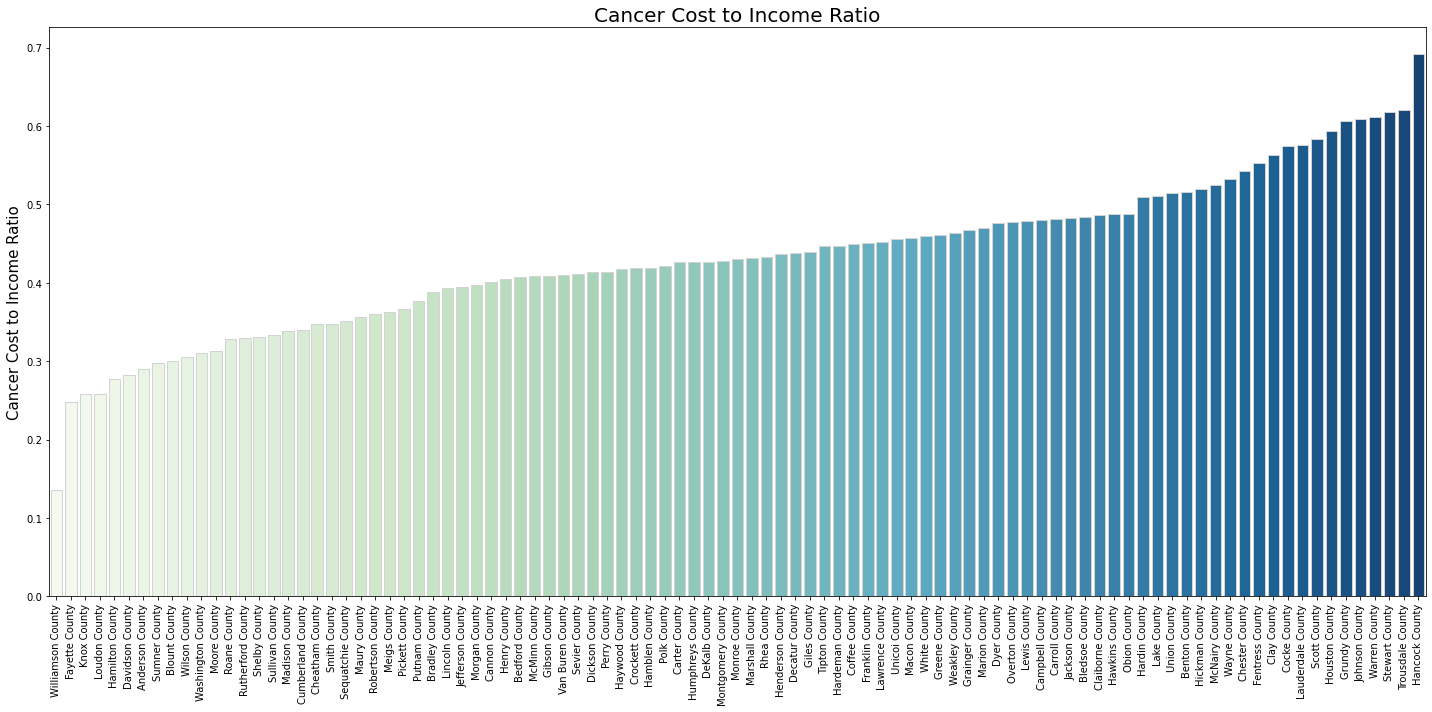

In [89]:
data = counties_merged.sort_values('cancer_cost_ratio')
plt.figure(figsize = (20,10))
# fig, ax = plt.subplots(facecolor='white')
sns.barplot('county', 'cancer_cost_ratio', data = data, palette = 'GnBu', edgecolor = 'lightgray')
plt.xticks(rotation = 90)
plt.xlabel('')
plt.ylabel('Cancer Cost to Income Ratio', fontsize=15)
plt.grid(False)
plt.title('Cancer Cost to Income Ratio', fontsize=20)
plt.tight_layout()
plt.savefig('../assets/cancer_cost_income_ratio_bar.png', dpi = 300);

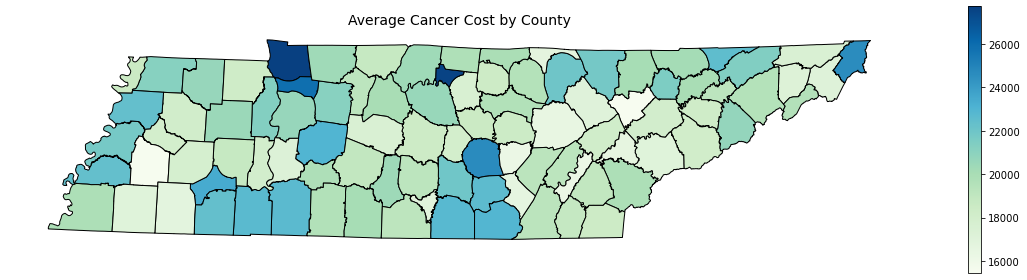

In [90]:
fig, ax = plt.subplots(figsize=(16,4))
counties_merged.plot(column = 'cancer_avg_cost', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
plt.title('Average Cancer Cost by County', fontsize = 14)
ax.axis('off')
plt.tight_layout()
plt.savefig('../assets/avg_cancer_cost_tncounty_.png', dpi = 300);